In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import joblib

RANDOM_STATE = 42
%matplotlib inline
sns.set_style('whitegrid')


In [2]:
df = pd.read_csv('data/winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns = df.columns.str.lower()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
ph,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Text(0, 0.5, 'Count')

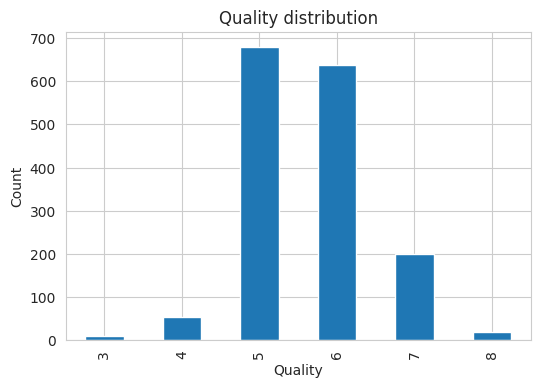

In [7]:
plt.figure(figsize=(6,4))
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Quality distribution')
plt.xlabel('Quality')
plt.ylabel('Count')


Text(0.5, 1.0, 'Correlation matrix')

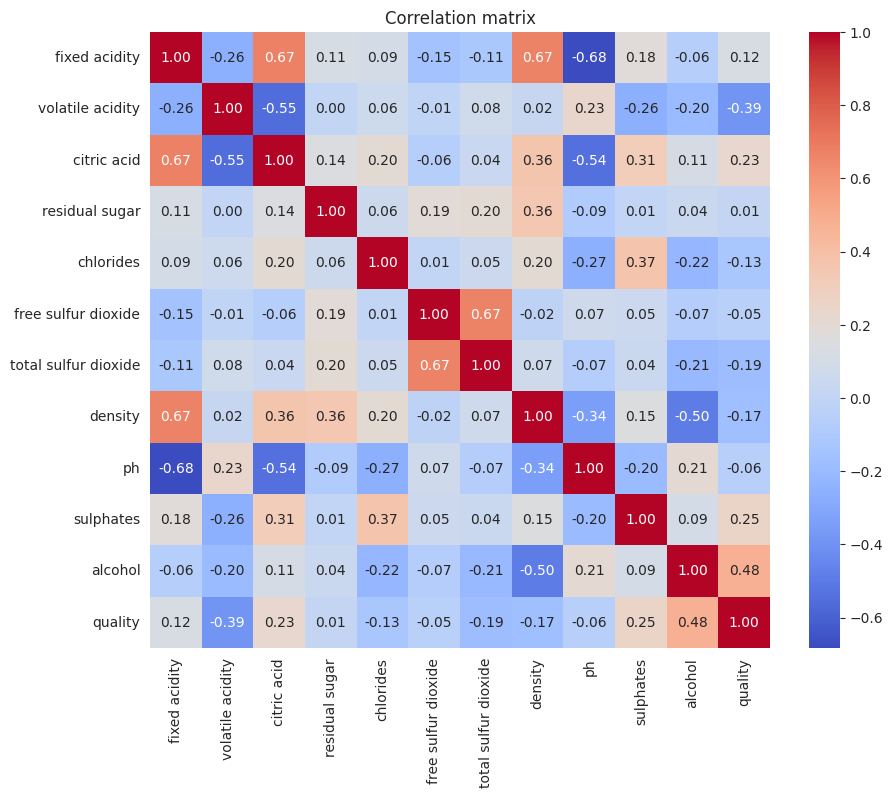

In [8]:
plt.figure(figsize=(10,8))
cm = df.corr()
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')

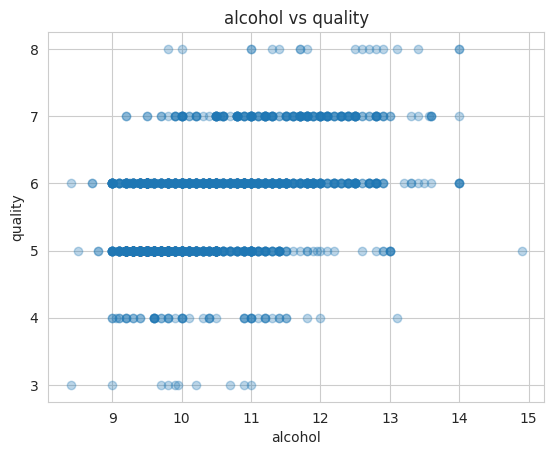

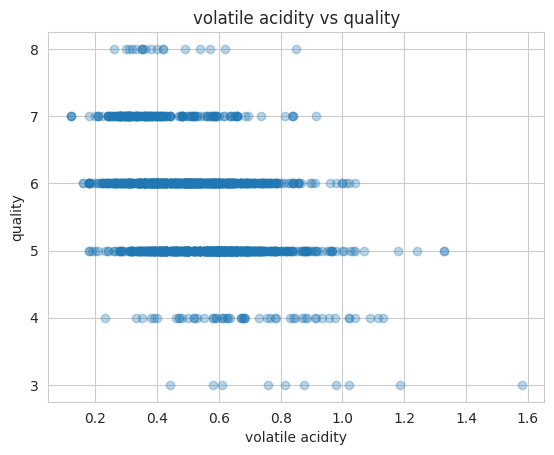

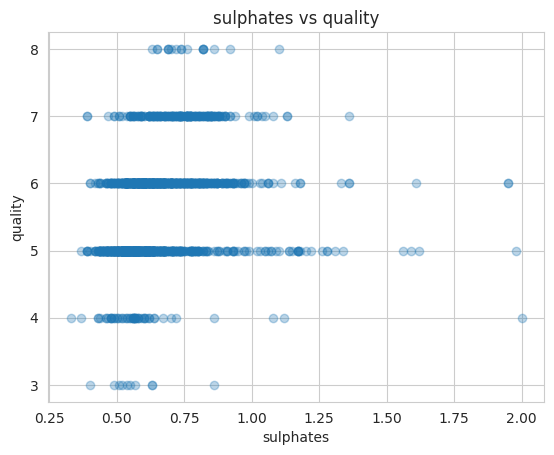

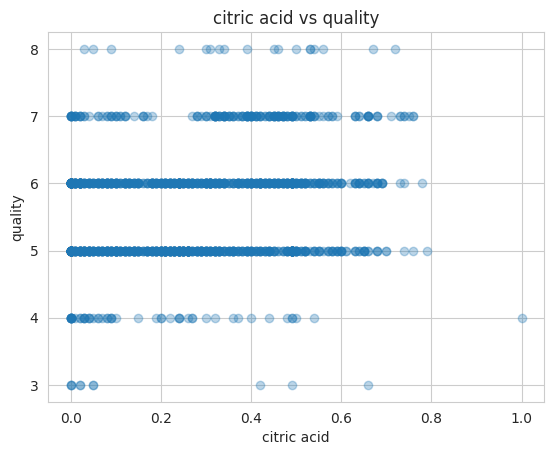

In [9]:
corr_target = cm['quality'].abs().sort_values(ascending=False)
corr_target
top_feats = corr_target.index[1:5]
for feat in top_feats:
    plt.figure()
    plt.scatter(df[feat], df['quality'], alpha=0.3)
    plt.xlabel(feat)
    plt.ylabel('quality')
    plt.title(f'{feat} vs quality')

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=RANDOM_STATE)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.quality
y_val = df_val.quality
y_test = df_test.quality

del df_train["quality"]
del df_val["quality"]
del df_test["quality"]

print(df_train.shape, df_val.shape, df_test.shape)

(959, 11) (320, 11) (320, 11)


In [11]:
# prepare numeric arrays for sklearn
# RandomForest can work directly with numeric features. No scaling required. 
X_train = df_train.values
X_val = df_val.values
X_test = df_test.values
feature_names = df_train.columns.tolist()
feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol']

In [12]:
rf = RandomForestRegressor(n_estimators=10, random_state=RANDOM_STATE, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse =  root_mean_squared_error(y_val, y_pred)
print('RMSE (n_estimators=10):', rmse)

RMSE (n_estimators=10): 0.6617684640416163


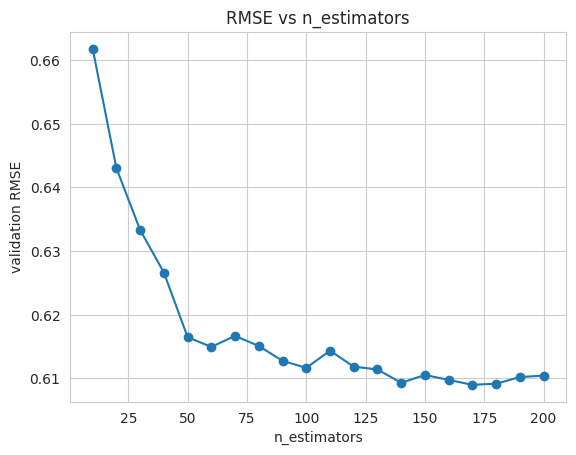

,n_estimators,rmse
0,10,0.661768
1,20,0.643009
2,30,0.633303
3,40,0.626628
4,50,0.616474


In [13]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=RANDOM_STATE, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    scores.append((n, rmse))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators, df_scores.rmse, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('validation RMSE')
plt.title('RMSE vs n_estimators')
plt.show()

df_scores.head()

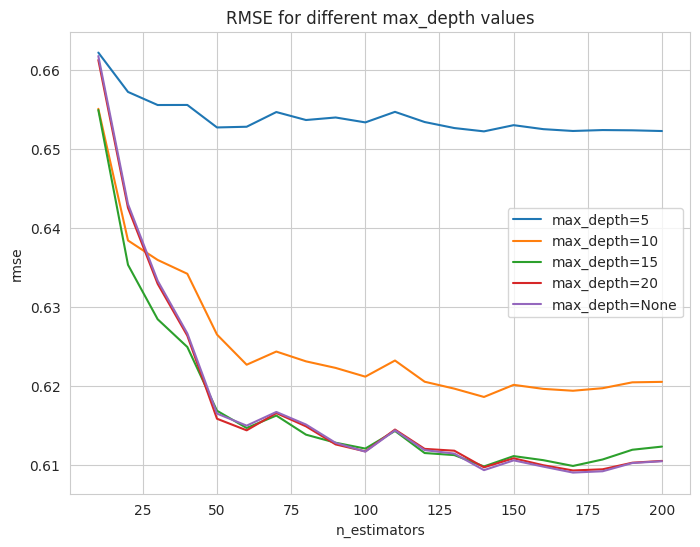

In [15]:
scores = []
for depth in [5, 10, 15, 20, None]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=RANDOM_STATE, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        scores.append((depth if depth is not None else -1, n, rmse))

df_grid = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])
# convert -1 back to None label for plotting
df_grid['max_depth_label'] = df_grid['max_depth'].replace({-1: 'None'})
plt.figure(figsize=(8,6))
for depth in df_grid.max_depth.unique():
    subset = df_grid[df_grid.max_depth == depth]
    label = 'None' if depth == -1 else str(int(depth))
    plt.plot(subset.n_estimators, subset.rmse, label=f'max_depth={label}')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('rmse')
plt.title('RMSE for different max_depth values')
plt.show()

In [16]:
best_row = df_grid.loc[df_grid.rmse.idxmin()]
best_depth = None if best_row.max_depth == -1 else int(best_row.max_depth)
best_n = int(best_row.n_estimators)
print('Best hyperparams (val):', 'max_depth=', best_depth, 'n_estimators=', best_n, 'val_rmse=', best_row.rmse)

# Retrain on train+val
X_trainval = np.vstack([X_train, X_val])
y_trainval = np.hstack([y_train, y_val])

final_rf = RandomForestRegressor(n_estimators=best_n, max_depth=best_depth, random_state=RANDOM_STATE, n_jobs=-1)
final_rf.fit(X_trainval, y_trainval)

# Evaluate on test
y_test_pred = final_rf.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print('Test RMSE:', test_rmse)

Best hyperparams (val): max_depth= None n_estimators= 170 val_rmse= 0.6090006668992548
Test RMSE: 0.5586488697639881


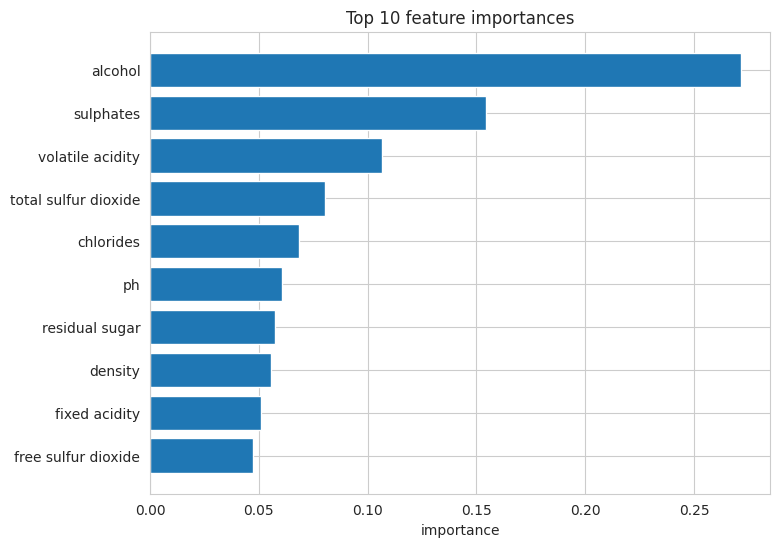

In [17]:
importances = final_rf.feature_importances_
df_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
df_importances = df_importances.sort_values(by='importance', ascending=False).reset_index(drop=True)
df_importances.head(10)

plt.figure(figsize=(8,6))
plt.barh(df_importances.feature.head(10)[::-1], df_importances.importance.head(10)[::-1])
plt.xlabel('importance')
plt.title('Top 10 feature importances')
plt.show()

In [18]:
joblib.dump({'model': final_rf, 'features': feature_names}, 'model.joblib')
print('Saved model.joblib')

Saved model.joblib
